## Data loading and other functions are same as we did for binary class

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
dict1 = unpickle('data_batch_1')
dict2 = unpickle('data_batch_2')
dict3 = unpickle('data_batch_3')
dict4 = unpickle('data_batch_4')
dict5 = unpickle('data_batch_5')
dict6 = unpickle('test_batch')

labels1 = dict1.get(b'labels')
labels1 = np.array(labels1)
labels2 = dict2.get(b'labels')
labels2 = np.array(labels2)
labels3 = dict3.get(b'labels')
labels3 = np.array(labels3)
labels4 = dict4.get(b'labels')
labels4 = np.array(labels4)
labels5 = dict5.get(b'labels')
labels5 = np.array(labels5)
labels6 = dict6.get(b'labels')
labels6 = np.array(labels6)

data1 = dict1.get(b'data')
data1 = np.array(data1)
data2 = dict2.get(b'data')
data2 = np.array(data2)
data3 = dict3.get(b'data')
data3 = np.array(data3)
data4 = dict4.get(b'data')
data4 = np.array(data4)
data5 = dict5.get(b'data')
data5 = np.array(data5)
data6 = dict6.get(b'data')
data6 = np.array(data6)

In [3]:
def five_objects_five_labels(data, labels, l1, l2, l3, l4, l5):
    indices_label0 = np.nonzero(labels == l1)
    indices_label1 = np.nonzero(labels == l2)
    indices_label2 = np.nonzero(labels == l3)
    indices_label3 = np.nonzero(labels == l4)
    indices_label4 = np.nonzero(labels == l5)
    a = np.array(np.nonzero(labels == l1))
    b = np.array(np.nonzero(labels == l2))
    c = np.array(np.nonzero(labels == l3))
    d = np.array(np.nonzero(labels == l4))
    e = np.array(np.nonzero(labels == l5))
    f = np.concatenate((a,b,c,d,e), axis = 1).flatten()
    np.random.shuffle(f)
    x = data[f]
    y = labels[f]
    y = np.where(y==l1, 0, y)
    y = np.where(y==l2, 1, y)
    y = np.where(y==l3, 2, y)
    y = np.where(y==l4, 3, y)
    y = np.where(y==l5, 4, y)
    
    y_neat = y.reshape(1,len(y))
    yhot = np.zeros((len(y),5))
    
    x = x/255
    x = (x - np.mean(x))/np.std(x)

    for i in range(len(y)):
        yhot[i][y_neat.astype(int)[:,i]-1] = 1
        
    y = yhot
    return x,y

In [4]:
x1, y1 = five_objects_five_labels(data1, labels1 , 0, 1,2,3,4)
x2, y2 = five_objects_five_labels(data2, labels2 , 0, 1,2,3,4)
x3, y3 = five_objects_five_labels(data3, labels3 , 0, 1,2,3,4)
x4, y4 = five_objects_five_labels(data4, labels4 , 0, 1,2,3,4)
x5, y5 = five_objects_five_labels(data5, labels5 , 0, 1,2,3,4)

In [5]:
X_train = np.concatenate((x1,x2,x3,x4,x5), axis= 0)

In [6]:
Y_train = np.concatenate((y1,y2,y3,y4,y5), axis=0)

In [7]:
x6, y6 = five_objects_five_labels(data6, labels6 , 0, 1,2,3,4)

In [8]:
X_test = x6

In [9]:
Y_test = y6

In [10]:
def relu_der(x):
    return (x>=0)

def relu(x):
    return np.maximum(0,x)

def softmax(x):
    x = np.maximum(-700,np.minimum(700,x))
    temp = np.exp(x - np.max(x))
    return temp/ temp.sum(axis=1, keepdims=True)

In [11]:
def init_layers(nn_architecture, seed = 99):
    np.random.seed(seed)
    number_of_layers = len(nn_architecture)
    params_values = {}

    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        layer_input_size = layer["input_dim"]
        layer_output_size = layer["output_dim"]
        
        params_values['W' + str(layer_idx)] =  0.2 * np.random.random((layer_input_size, layer_output_size)) * 0.1
        params_values['b' + str(layer_idx)] =  0.2 * np.random.random(layer_output_size) * 0.1
        
    return params_values

In [12]:
def single_layer_forward_propagation(A_prev, W_curr, b_curr, activation):
    Z_curr = np.dot(A_prev, W_curr) + b_curr
    
    if activation is "relu":
        activation_func = relu
    elif activation is "softmax":
        activation_func = softmax
    else:
        raise Exception('Check Activation Function!!!')
        
    return activation_func(Z_curr), Z_curr

In [13]:
def full_forward_propagation(X, params_values, nn_architecture):
    memory = {}
    A_curr = X
    
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        A_prev = A_curr
        
        activ_function_curr = layer["activation"]
        W_curr = params_values["W" + str(layer_idx)]
        b_curr = params_values["b" + str(layer_idx)]
        A_curr, Z_curr = single_layer_forward_propagation(A_prev, W_curr, b_curr, activ_function_curr)
        
        memory["A" + str(idx)] = A_prev
        memory["Z" + str(layer_idx)] = Z_curr
       
    return A_curr, memory

In [14]:
def full_backward_propagation(Y_hat, Y, memory, params_values, nn_architecture):
    grads_values = {}
    m = Y.shape[1]

    for layer_idx_prev, layer in reversed(list(enumerate(nn_architecture))):
        layer_idx_curr = layer_idx_prev + 1
        activ_function_curr = layer["activation"]
        
        
        A_prev = memory["A" + str(layer_idx_prev)]
        Z_curr = memory["Z" + str(layer_idx_curr)]
        W_curr = params_values["W" + str(layer_idx_curr)]
        b_curr = params_values["b" + str(layer_idx_curr)]
        
        if activ_function_curr is "softmax":
            delta = Y_hat - Y
            dW_curr = np.dot(A_prev.T,delta)
            db_curr = delta.sum(axis=0)/m
        elif activ_function_curr is "relu":
            W_curr = params_values["W" + str(layer_idx_curr+1)]
            delta = np.dot(delta, W_curr.T) * relu_der(Z_curr)
            dW_curr = np.dot(A_prev.T, delta)
            db_curr = delta.sum(axis=0)/m
        
        grads_values["dW" + str(layer_idx_curr)] = dW_curr
        grads_values["db" + str(layer_idx_curr)] = db_curr
    
    return grads_values

In [15]:
def update(params_values, grads_values, nn_architecture, learning_rate):
    for idx, layer in enumerate(nn_architecture):
        layer_idx = idx + 1
        params_values["W" + str(layer_idx)] -= learning_rate * grads_values["dW" + str(layer_idx)]        
        params_values["b" + str(layer_idx)] -= learning_rate * grads_values["db" + str(layer_idx)]

    return params_values

In [16]:
def train(x_train1, y_train1, learning_rate, epochs, batch_size, nn_architecture2):    
    loss_history = []
    loss_per_epoch = np.zeros((epochs,1))
    #epochs = 10
    train_data_len = len(y_train1)
    #batch_size = 10
    params_values4 = init_layers(nn_architecture2)
    for j in range(epochs):
        for i in range(int(train_data_len/batch_size)):
            batch_start =  i*batch_size
            batch_end = (i+1)*batch_size
            x_trainb = x_train1[batch_start:batch_end]
            y_trainb = y_train1[batch_start:batch_end]
            A_prev5, memory5 = full_forward_propagation(x_trainb, params_values4, nn_architecture2)
            grads_values4 = full_backward_propagation(A_prev5, y_trainb, memory5, params_values4, nn_architecture2)
            params_values4 = update(params_values4, grads_values4, nn_architecture2, learning_rate)
            A_prev5 = np.maximum(0.000000001,np.minimum(0.99999999999,A_prev5))
            losss = np.sum(-y_trainb * np.log(A_prev5 + 1e-8))
            loss_history.append(losss)
        
        losss_array = np.array(loss_history)
        loss_per_epoch[j] = np.mean(losss_array)
        loss_history = []
        A_prev6, memory6 = full_forward_propagation(x_train1, params_values4, nn_architecture2)        
        #loss4 = np.sum(-y_train1 * np.log(A_prev6+ 1e-8))
        #loss_history.append(loss4)
        print('Epoch number = ' + str(j+1))
        print('Loss function value: ', loss_per_epoch[j])
        print('\n')
    count = 0
    for k in range(len(y_train1)):
        if(np.argmax(y_train1[k])==np.argmax(A_prev6[k])):
            count += 1

    correct_pred = (count/len(y_train1))*100
    print('\n')
    print('\n')
    print('Training accuracy: ' + str(correct_pred))
    print('\n')
    print('\n')
        
    yy = loss_per_epoch
    xx = np.arange(1,epochs+1)
    plt.plot(xx,yy)
    plt.title('CIFAR 10 binary classification Training Loss vs Number of Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    
    return params_values4, loss_per_epoch, memory6

In [17]:
def test(X_test, Y_test, params_values, nn_architecture):
    prediction, memory = full_forward_propagation(X_test, params_values, nn_architecture)
    count = 0
    for k in range(len(Y_test)):
        if(np.argmax(Y_test[k])==np.argmax(prediction[k])):
            count += 1

    correct_pred = (count/len(Y_test))*100
    print('\n')
    print('\n')
    print('Test accuracy: ' + str(correct_pred))
    print('\n')
    print('\n')
    return prediction, memory

In [18]:
nn_architecture2 = [
    {"input_dim": 3072, "output_dim": 500, "activation": "relu"},
#     {"input_dim": 500, "output_dim": 100, "activation": "relu"},
#      {"input_dim": 100, "output_dim": 50, "activation": "relu"},
#     {"input_dim": 60, "output_dim": 40, "activation": "relu"},
    {"input_dim": 500, "output_dim": 5, "activation": "softmax"},
]

Epoch number = 1
Loss function value:  [27.00541423]


Epoch number = 2
Loss function value:  [11.89206071]


Epoch number = 3
Loss function value:  [10.58824463]


Epoch number = 4
Loss function value:  [9.99898855]


Epoch number = 5
Loss function value:  [9.5445145]


Epoch number = 6
Loss function value:  [9.14650546]


Epoch number = 7
Loss function value:  [8.79227237]


Epoch number = 8
Loss function value:  [8.46528683]


Epoch number = 9
Loss function value:  [8.15711137]


Epoch number = 10
Loss function value:  [7.86325049]


Epoch number = 11
Loss function value:  [7.57305749]


Epoch number = 12
Loss function value:  [7.28694437]


Epoch number = 13
Loss function value:  [7.00750122]


Epoch number = 14
Loss function value:  [6.73586525]


Epoch number = 15
Loss function value:  [6.46927007]


Epoch number = 16
Loss function value:  [6.18914065]


Epoch number = 17
Loss function value:  [5.93344987]


Epoch number = 18
Loss function value:  [5.6639814]


Epoch number = 19


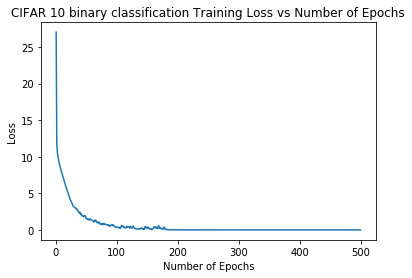

In [20]:
p, l, m = train(X_train, Y_train, 0.0005, 500, 10, nn_architecture2)

In [21]:
prediction, mem = test(X_test, Y_test, p, nn_architecture2)





Test accuracy: 64.74






## We got training accuracy of 100 % and testing accuracy of 64.74 % for 5 objects using numpy. The 5 objects were Automobile, Aeroplane, Bird, Cat and Deer.